<a href="https://colab.research.google.com/github/jparr2407/Nintendo-Project/blob/main/Projeto_nintendo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processo entendimento, tratamento e limpeza dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('/content/NintendoGames.csv')
df

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"
...,...,...,...,...,...,...,...,...,...
1089,NaN,Yo-kai Watch 4,Switch,TBA,NaN,/game/switch/yo-kai-watch-4,E10+,['Level 5'],"['Role-Playing', 'Trainer']"
1090,NaN,Splatoon 3: Expansion Pass Wave 2 - Side Order,Switch,TBA,NaN,/game/switch/splatoon-3-expansion-pass-wave-2-...,NaN,['Nintendo'],"['Action', 'Shooter', 'Third-Person', 'Arcade']"
1091,NaN,Mario Kart 8 Deluxe: Booster Course Pass - Wave 6,Switch,TBA,NaN,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
1092,NaN,Princess Peach for Nintendo Switch,Switch,TBA 2024,NaN,/game/switch/princess-peach-for-nintendo-switch,NaN,['Nintendo'],"['Adventure', 'General']"


In [3]:
df.describe()

,meta_score,user_score
count,709.000000,856.000000
mean,76.083216,7.671612
std,10.610735,1.031266
min,37.000000,3.100000
25%,69.000000,7.200000
50%,77.000000,7.900000
75%,83.000000,8.400000
max,99.000000,9.600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   709 non-null    float64
 1   title        1094 non-null   object 
 2   platform     1094 non-null   object 
 3   date         1094 non-null   object 
 4   user_score   856 non-null    float64
 5   link         1094 non-null   object 
 6   esrb_rating  972 non-null    object 
 7   developers   1091 non-null   object 
 8   genres       1094 non-null   object 
dtypes: float64(2), object(7)
memory usage: 77.0+ KB


In [5]:
df.dtypes

meta_score     float64
title           object
platform        object
date            object
user_score     float64
link            object
esrb_rating     object
developers      object
genres          object
dtype: object

In [6]:
df.isnull().sum()

meta_score     385
title            0
platform         0
date             0
user_score     238
link             0
esrb_rating    122
developers       3
genres           0
dtype: int64

In [7]:
# Exclui todas as linhas com valores nulos na coluna "meta_score"
df_cleaned = df.dropna(subset=["meta_score"])

# Exclui as linhas com "canceled" na coluna "date" no DataFrame df_cleaned
df_cleaned = df_cleaned.loc[df_cleaned["date"] != "Canceled"]

df_cleaned

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
5,87.0,Pikmin 4,Switch,"Jul 21, 2023",9.0,/game/switch/pikmin-4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Mario Kart 8 Deluxe: Booster Course Pass - Wave 5,Switch,"Jul 12, 2023",7.6,/game/switch/mario-kart-8-deluxe-booster-cours...,NaN,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Everybody 1-2-Switch!,Switch,"Jun 30, 2023",5.4,/game/switch/everybody-1-2-switch!,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Pikmin 1,Switch,"Jun 21, 2023",8.4,/game/switch/pikmin-1,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Pikmin 2,Switch,"Jun 21, 2023",8.6,/game/switch/pikmin-2,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...,...,...
1067,90.0,Blast Corps,N64,"Feb 28, 1997",8.4,/game/nintendo-64/blast-corps,E,['Rare Ltd.'],"['Action', 'General']"
1068,83.0,Mario Kart 64,N64,"Feb 10, 1997",8.6,/game/nintendo-64/mario-kart-64,E,['Nintendo'],"['Driving', 'Racing', 'Kart']"
1069,92.0,Wave Race 64,N64,"Nov 1, 1996",8.3,/game/nintendo-64/wave-race-64,E,['Nintendo'],"['Driving', 'Racing', 'Snow / Water']"
1070,80.0,Pilotwings 64,N64,"Sep 29, 1996",7.9,/game/nintendo-64/pilotwings-64,E,['Paradigm Entertainment'],"['Simulation', 'General']"


# Contagem de frequência de plataformas

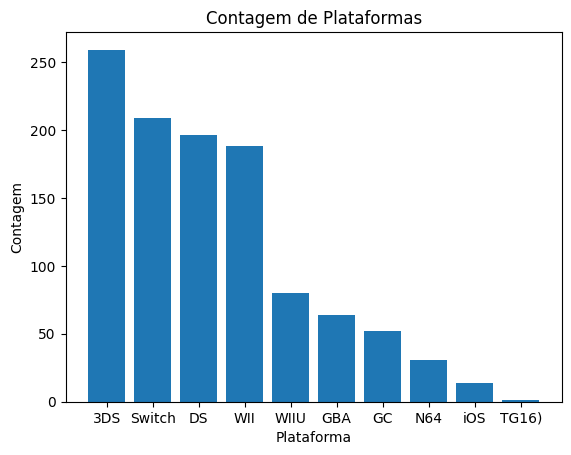

In [8]:
# Contagem de frequência de plataformas
platform_counts = df["platform"].value_counts()

# Plotagem do gráfico de barras
plt.bar(platform_counts.index, platform_counts.values)
plt.xlabel("Plataforma")
plt.ylabel("Contagem")
plt.title("Contagem de Plataformas")
plt.show()

Esse gráfico ajuda a responder perguntas como "Qual plataforma tem o maior número de jogos no conjunto de dados?" e fornece uma repesentação visual da distribuição das plataformas de jogos.

É possível entender que a plataforma com mais lançamentos é o nintendo 3DS e a com menos lançamentos é o TG16.

# Contagem de frequência de Faixa Etária

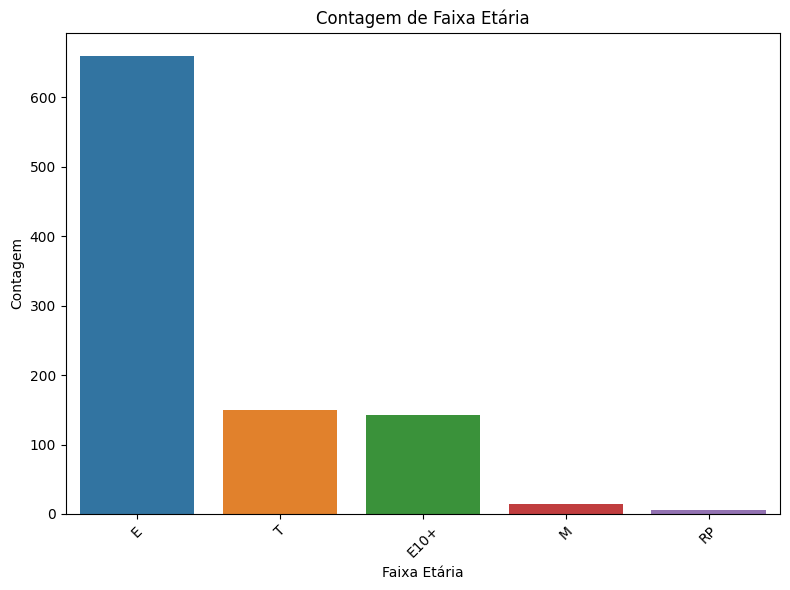

In [9]:
# Contar os valores da coluna esrb_rating
esrb_counts = df["esrb_rating"].value_counts()

# Substituir valores nulos por "TBA" na coluna esrb_rating
df["esrb_rating"].fillna("TBA", inplace=True)

# Criar uma plotagem usando Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=esrb_counts.index, y=esrb_counts.values)
plt.xlabel("Faixa Etária")
plt.ylabel("Contagem")
plt.title("Contagem de Faixa Etária")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aqui nós podemos visualizar a distribuição das classificações etárias dos jogos no conjunto de dados e fornece informações sobre quais classificações são mais comuns.

Aqui é possível identificar que a classificação preferida pelos desenvolvedores é a "E" e a menos preferida é a "RP", vou deixar uma legenda para facilitar o entendimento dos tipos de classificação.

*   E: Everyone (Todos)
*   T: Teen (Acima de 13 anos)
*   E10+: Everyone 10+ (Acima de 10 anos)
*   TBA: To be announced (Está para ser anunciado)
*   M: Mature (Acima de 17 anos)
*   RP: Rating pending (Ainda está sendo definido)







# Quantidade de Lançamentos por ano

In [10]:
# Exclui todas as linhas com valores nulos na coluna "meta_score"
df_cleaned = df.dropna(subset=["meta_score"])

# Exclui as linhas com "canceled" na coluna "date" no DataFrame df_cleaned
df_cleaned = df_cleaned.loc[df_cleaned["date"] != "Canceled"]

df_cleaned

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
5,87.0,Pikmin 4,Switch,"Jul 21, 2023",9.0,/game/switch/pikmin-4,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
7,74.0,Mario Kart 8 Deluxe: Booster Course Pass - Wave 5,Switch,"Jul 12, 2023",7.6,/game/switch/mario-kart-8-deluxe-booster-cours...,TBA,['Nintendo'],"['Racing', 'Arcade', 'Automobile']"
8,56.0,Everybody 1-2-Switch!,Switch,"Jun 30, 2023",5.4,/game/switch/everybody-1-2-switch!,E,['Nintendo'],"['Miscellaneous', 'Party / Minigame']"
9,82.0,Pikmin 1,Switch,"Jun 21, 2023",8.4,/game/switch/pikmin-1,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
10,65.0,Pikmin 2,Switch,"Jun 21, 2023",8.6,/game/switch/pikmin-2,E10+,['Nintendo'],"['Strategy', 'Real-Time', 'General']"
...,...,...,...,...,...,...,...,...,...
1067,90.0,Blast Corps,N64,"Feb 28, 1997",8.4,/game/nintendo-64/blast-corps,E,['Rare Ltd.'],"['Action', 'General']"
1068,83.0,Mario Kart 64,N64,"Feb 10, 1997",8.6,/game/nintendo-64/mario-kart-64,E,['Nintendo'],"['Driving', 'Racing', 'Kart']"
1069,92.0,Wave Race 64,N64,"Nov 1, 1996",8.3,/game/nintendo-64/wave-race-64,E,['Nintendo'],"['Driving', 'Racing', 'Snow / Water']"
1070,80.0,Pilotwings 64,N64,"Sep 29, 1996",7.9,/game/nintendo-64/pilotwings-64,E,['Paradigm Entertainment'],"['Simulation', 'General']"


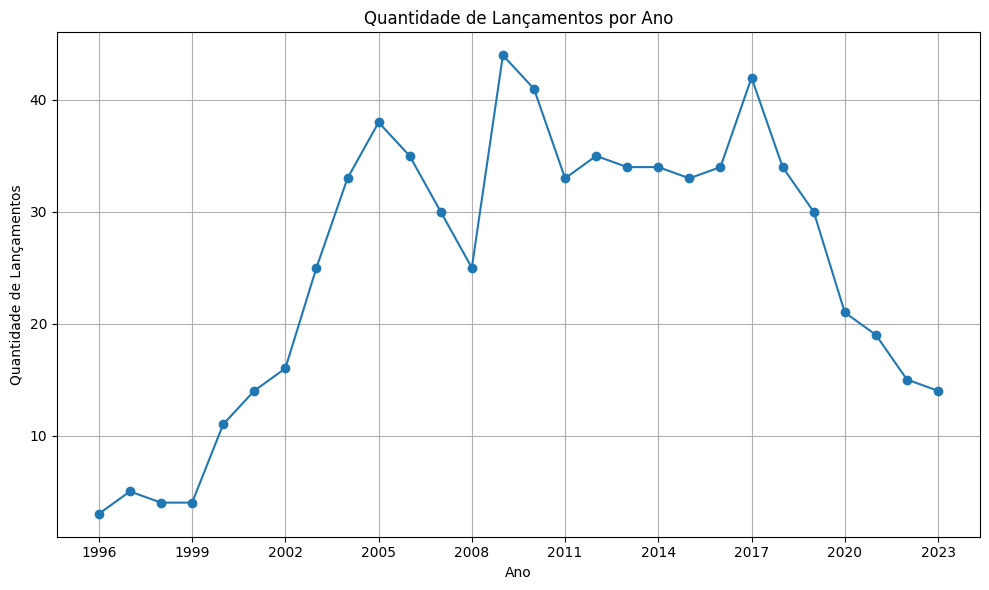

In [11]:
# Converte a coluna "date" para o formato de data
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"], errors="coerce")

# Agrupa os lançamentos por ano e conta a quantidade de lançamentos
yearly_counts = df_cleaned.groupby(df_cleaned["date"].dt.year).size()

# Cria um gráfico de linhas
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind="line", marker="o")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Lançamentos")
plt.title("Quantidade de Lançamentos por Ano")
plt.xticks(yearly_counts.index[::3])  # Mostra rótulos a cada 3 anos
plt.grid()
plt.tight_layout()
plt.show()

Aqui é possível visualizar a tendência ao longo do tempo no número de lançamento dej ogos e permite identificar padrões de crescimento ou declínio ao longo dos anos.

Conseguimos identificar que teve um crescimento exponencial desde 1996 até 2005, e depois um pico em 2009. Após isso, a tendência foi estabilizar os lançamentos e a partir de 2017/2018 foi diminuindo, pois a qualidade dos jogos foi aumentando e as criações ficaram mais rigorosas. Hoje em dia há menos lançamentos, porém, os jogos são lançados com mais qualidade.

# Desenvolvedores com mais lançamentos

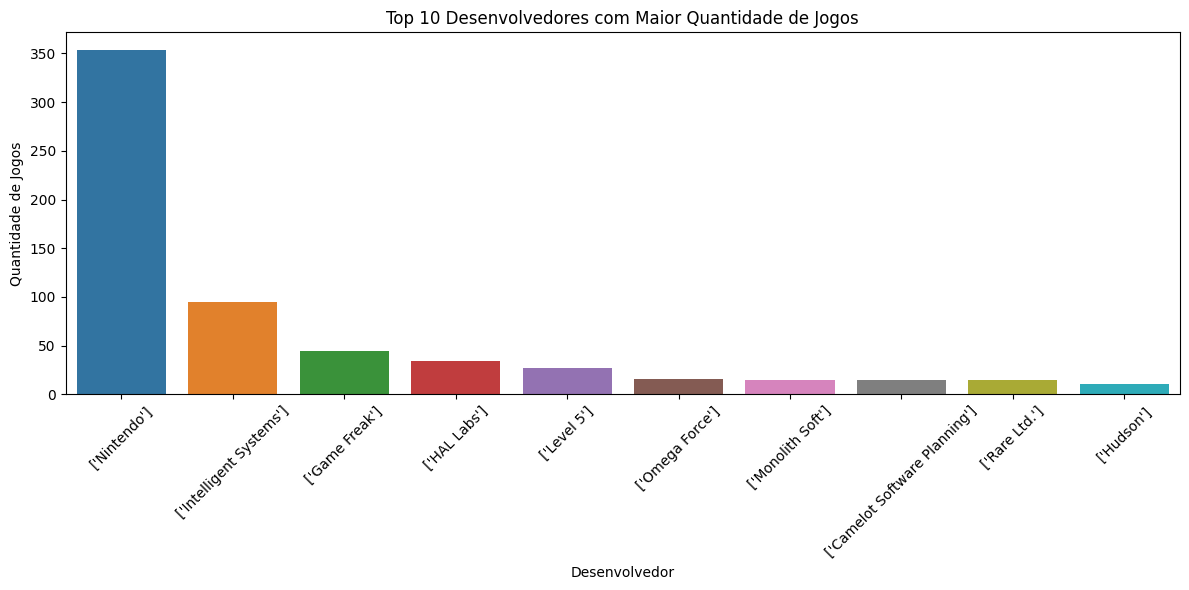

In [12]:
# Contar os valores da coluna developers
developers_counts = df["developers"].value_counts()

# Selecionar os 10 maiores desenvolvedores
top_10_developers = developers_counts.head(10)

# Criar uma plotagem dos 10 maiores desenvolvedores
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_developers.index, y=top_10_developers.values)
plt.xlabel("Desenvolvedor")
plt.ylabel("Quantidade de Jogos")
plt.title("Top 10 Desenvolvedores com Maior Quantidade de Jogos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O objetivo desta visualização é realizar uma análise dos desenvolvedores que possuem mais lançamentos ao longo dos anos.

É possível identificar os principais desenvolvedores que possuem uma presença significativa no mundo dos jogos. Como podemos ver, a Nintendo lidera nesses termos, isso se deve ao fato de terem diversas plataformas criadas por eles, então consequentemente eles possuem mais lançamentos.

Mas nem sempre ter mais lançamentos significa que é melhor, veremos isso um pouco abaixo.

# Desenvolvedores com jogos mais bem avaliados

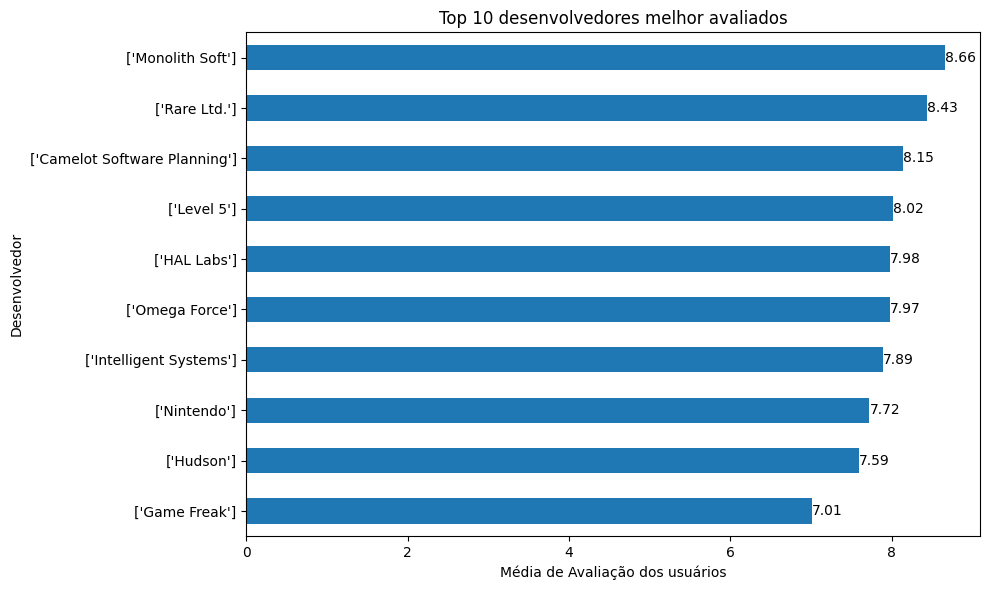

In [13]:
# Calcular a média de user_score para os top 10 desenvolvedores
top_10_developers = df["developers"].value_counts().head(10).index
average_user_scores = df[df["developers"].isin(top_10_developers)].groupby("developers")["user_score"].mean()

# Criar uma plotagem da média de user_score com rótulos de dados
plt.figure(figsize=(10, 6))
ax = average_user_scores.sort_values().plot(kind="barh")
plt.xlabel("Média de Avaliação dos usuários")
plt.ylabel("Desenvolvedor")
plt.title("Top 10 desenvolvedores melhor avaliados")

# Adicionar rótulos de dados nas barras
for index, value in enumerate(average_user_scores.sort_values()):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

O objetivo desse gráfico é calcular a média das avaliações do usuários e visualizar os principais desenvolvedores com base na quantidade de jogos produzidos.

Como dito um pouco acima, nem sempre mais lançamentos siginificam que são melhores. A Nintendo por conta de ter milhares de lançamentos, tem conteúdos bons e ruins, o que acaba deixando a nota média bem abaixo. Já com a desenvolvedora "Monolith Soft", é uma das que possuem menos lançamentos, mas mesmo com pouco, conseguiu agradar a grande maioria do público. É legal as empresas de desenvolvimento entenderem isso e tomar decisões vendo o padrão de lançamento dessa desenvolvedora, para talvez conseguir o mesmo resultado ou melhor.

# Melhores jogos com base nos usuários


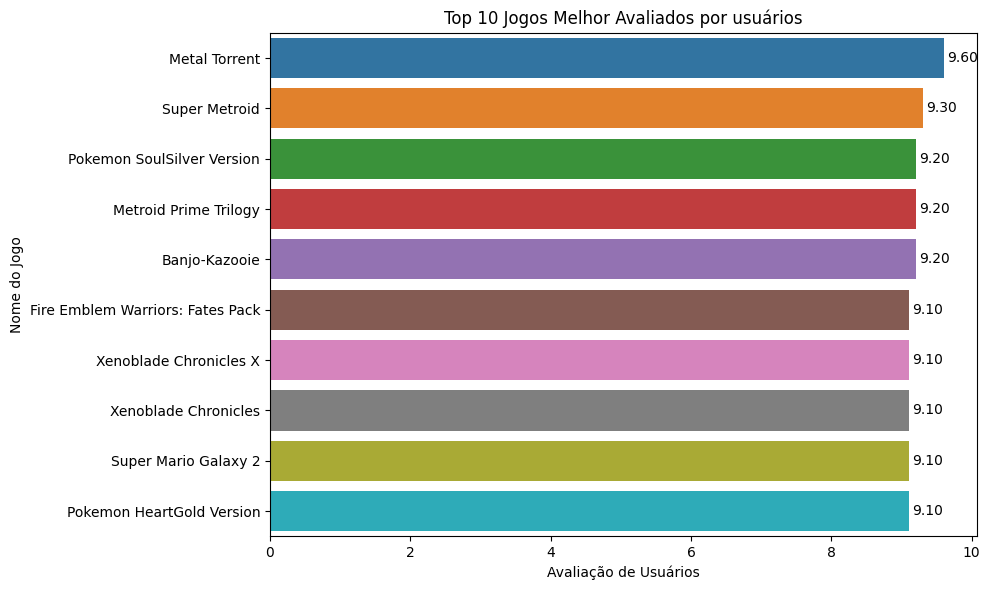

In [14]:
# Selecionar os top 10 títulos melhor avaliados por user_score
top_10_user_score = df.nlargest(10, "user_score")

# Criar uma plotagem usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="user_score", y="title", data=top_10_user_score)
plt.xlabel("Avaliação de Usuários")
plt.ylabel("Nome do Jogo")
plt.title("Top 10 Jogos Melhor Avaliados por usuários")

# Adicionar rótulos de dados nas barras
for index, value in enumerate(top_10_user_score["user_score"]):
    plt.text(value + 0.05, index, f'{value:.2f}', ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

O objetivo aqui é identificar os principais jogos com melhores avaliações dos usuários.

Nós conseguimos identificar que o jogo Metal Torrent, do gênero FPS e desenvolvido pela Nintendo, é o jogo preferido pelos usuários desde 2010, que foi a data de lançamento deste jogo.

# Melhores jogos com base na mídia (Site Meta)




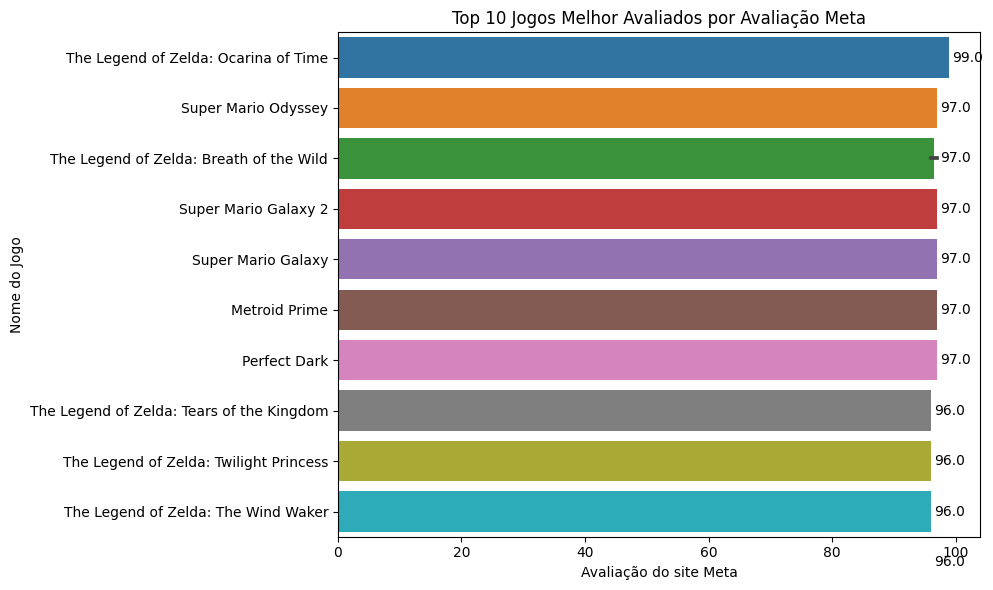

In [15]:
# Selecionar os top 10 títulos melhor avaliados por meta_score
top_10_meta_score = df.nlargest(11, "meta_score")

# Criar uma plotagem usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="meta_score", y="title", data=top_10_meta_score)
plt.xlabel("Avaliação do site Meta")
plt.ylabel("Nome do Jogo")
plt.title("Top 10 Jogos Melhor Avaliados por Avaliação Meta")

# Adicionar rótulos de dados nas barras
for index, value in enumerate(top_10_meta_score["meta_score"]):
    plt.text(value + 0.5, index, f'{value}', ha='left', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

O objetivo deste código é identificar os jogos com melhor avaliação com base na mídia (Site Meta) e criar um gráfico de barras ajuda a entender a distribuição.

A partir dessa visualização é possível entender que o "Zelda: Ocarina of time" é um dos melhores jogos já lançados, com a incrível nota de 99.0, nenhum outro jogo atingiu esse patamar. Mas não podemos deixar de olhar também para os jogos com avaliação de 97.0, que são jogos tão bons quanto Zelda, e por incrível que pareça, todos os jogos desta lista são da Nintendo. Anteriormente vimos que a quantidade de lançamentos diminuiu bastante, mas em compensação, a qualidade dos jogos aumento drásticamente.

# Gêneros mais frequentes em jogos

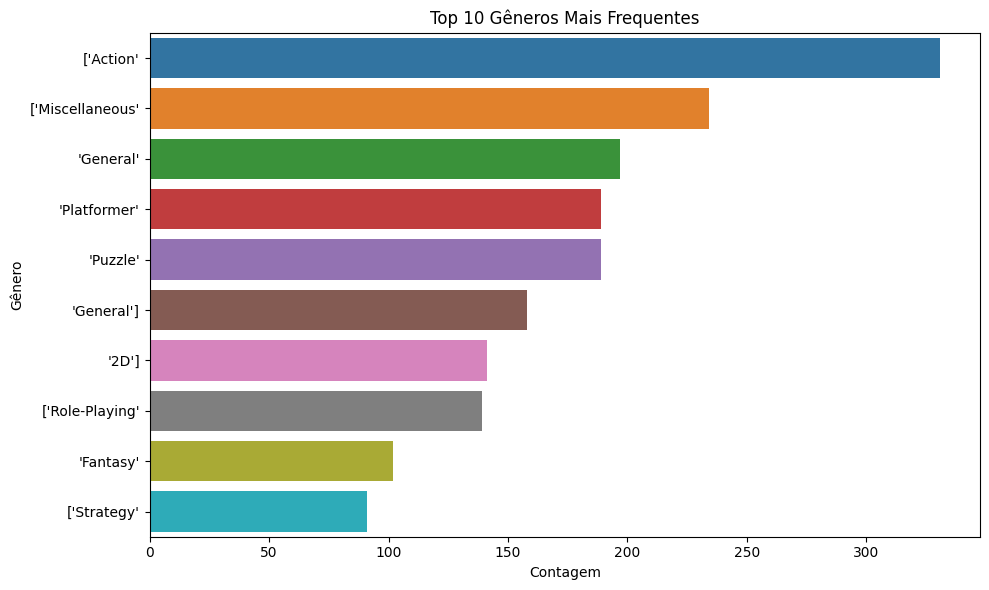

In [16]:
# Dividir os gêneros em várias entradas e contar individualmente
genre_counts = Counter(g.strip() for genres in df["genres"].str.split(",") for g in genres)

# Criar um DataFrame a partir da contagem
genre_counts_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Contagem'])
genre_counts_df.index.name = 'Gênero'
genre_counts_df.reset_index(inplace=True)

# Ordenar o DataFrame por contagem decrescente
genre_counts_df.sort_values(by='Contagem', ascending=False, inplace=True)

# Selecionar os top 10 gêneros mais frequentes
top_10_genre_counts = genre_counts_df.head(10)

# Criar uma plotagem usando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Contagem', y='Gênero', data=top_10_genre_counts)
plt.xlabel("Contagem")
plt.ylabel("Gênero")
plt.title("Top 10 Gêneros Mais Frequentes")
plt.tight_layout()
plt.show()

O objetivo aqui é analisar os gêneros dos jogos no conjunto de dados e entender quais são os gêneros com mais frequência dentre os lançamentos.

É possível identificar os gêneros preferidos pelas desenvolvedoras são jogos de **Ação** e os menos preferidos são jogos de **Estratégia**.